In [1]:
import tensorflow as tf
import os
import pickle
import numpy as np
import slim
CIFAR_DIR = "../cifar-10-batches-py"
print(os.listdir(CIFAR_DIR))
import matplotlib.pyplot as plt

['.ipynb_checkpoints', '0.py', '2.csv', '3.csv', '3chTest', '3chTrain', 'a.jpg', 'batches.meta', 'checkpoint', 'data', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'imageChangeChannel.ipynb', 'readme.html', 'resize.py', 'SSGAN_VS_CNN-Copy1.ipynb', 'SSGAN_VS_CNN.ipynb', 'test', 'test.png', 'test1.png', 'test2', 'test2.png', 'test3', 'testNew', 'test_batch', 'test_cifar10', 'train', 'train2', 'train3', 'trainNew', 'train_cifar10', 'Untitled-Copy1.ipynb', 'Untitled1.ipynb']


In [11]:
import os 
import numpy as np
from PIL import Image
def load_Traindata():
    train = []
    file_names = os.listdir('./3chTrain/')
    for i in range(len(file_names)):
        im = Image.open('./3chTrain/'+file_names[i])
        im2 = np.array(im)
        train.append(im2)
    train2 = np.array(train)
    
    #test2 = np.array(test)
    train_lable = np.zeros((len(train2),1),dtype='int8')
    #test_lable = np.zeros((len(test2),1),dtype='int8')
    for i in range(6):
        for j in range(i*1346, (i+1)*1346):
            train_lable[j,0] = i
   
    train_lable = train_lable.reshape((train_lable.shape[0],))
    return (train2, train_lable)
def load_Testdata():
    test = []
    file_names = os.listdir('./3chTest/')
    for i in range(len(file_names)):
        im = Image.open('./3chTest/'+file_names[i])
        im2 = np.array(im)
        test.append(im2)
    test2 = np.array(test)
    #train_lable = np.zeros((len(train2),1),dtype='int8')
    test_lable = np.zeros((len(test2),1),dtype='int8')
    for i in range(6):
        for j in range(i*800, (i+1)*800):
            test_lable[j,0] = i
    test_lable = test_lable.reshape((test_lable.shape[0],))
    return (test2, test_lable)

In [12]:
def load(checkpoint_dir, saver, sess):
    import re
    print(" [*] Reading checkpoints...")
    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt and ckpt.model_checkpoint_path:
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        saver.restore(sess, os.path.join(checkpoint_dir, ckpt_name))
        counter = int(next(re.finditer("(\d+)(?!.*\d)", ckpt_name)).group(0))
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0


def save(checkpoint_dir, step, saver, sess):
    model_name = "cDCGAN.model"
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    saver.save(sess, os.path.join(checkpoint_dir, model_name), global_step=step)

In [13]:
class SteelData:
    def __init__(self,  need_shuffle, isTrain):
        all_data = []
        all_labels = []
        if isTrain:
            data, labels = load_Traindata()
        else:
            data, labels = load_Testdata()
        all_data.append(data)
        all_labels.append(labels)
        self._data = np.vstack(all_data)
        self._data = self._data / 127.5 - 1
        self._labels = np.hstack(all_labels)
        print(self._data.shape)
        print(self._labels.shape)
        
        self._num_examples = self._data.shape[0]
        self._need_shuffle = need_shuffle
        self._indicator = 0
        if self._need_shuffle:
            self._shuffle_data()
            
    def _shuffle_data(self):
        # [0,1,2,3,4,5] -> [5,3,2,4,0,1]
        p = np.random.permutation(self._num_examples)
        self._data = self._data[p]
        self._labels = self._labels[p]
    
    def next_batch(self, batch_size):
        """return batch_size examples as a batch."""
        end_indicator = self._indicator + batch_size
        if end_indicator > self._num_examples:
            if self._need_shuffle:
                self._shuffle_data()
                self._indicator = 0
                end_indicator = batch_size
            else:
                raise Exception("have no more examples")
        if end_indicator > self._num_examples:
            raise Exception("batch size is larger than all examples")
        batch_data = self._data[self._indicator: end_indicator]
        batch_labels = self._labels[self._indicator: end_indicator]
        self._indicator = end_indicator
        return batch_data, batch_labels

#train_filenames = [os.path.join(CIFAR_DIR, 'train' % i) for i in range(1, 6)]
#test_filenames = [os.path.join(CIFAR_DIR, 'test_batch')]

train_data = SteelData(True, True)
test_data = SteelData(False,False)

(8076, 64, 64, 3)
(8076,)
(4800, 64, 64, 3)
(4800,)


 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ./checkpoint/train_cDCGAN\cDCGAN.model-421
 [*] Success to read cDCGAN.model-421
 [*] Load SUCCESS
[Train] Step: 500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 500, acc: 0.53125
[Train] Step: 1000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 1000, acc: 0.53125
[Train] Step: 1500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 1500, acc: 0.53125
[Train] Step: 2000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 2000, acc: 0.53125
[Train] Step: 2500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 2500, acc: 0.54688
[Train] Step: 3000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 3000, acc: 0.54688
[Train] Step: 3500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 3500, acc: 0.54688
[Train] Step: 4000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] St

[Train] Step: 37500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 37500, acc: 0.62500
[Train] Step: 38000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 38000, acc: 0.62500
[Train] Step: 38500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 38500, acc: 0.68750
[Train] Step: 39000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 39000, acc: 0.67188
[Train] Step: 39500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 39500, acc: 0.59375
[Train] Step: 40000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 40000, acc: 0.56250
[Train] Step: 40500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 40500, acc: 0.75000
[Train] Step: 41000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 41000, acc: 0.70312
[Train] Step: 41500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 41500, acc: 0.60938
[Train] Step: 42000

(4800, 64, 64, 3)
(4800,)
[Test ] Step: 75000, acc: 0.54688
[Train] Step: 75500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 75500, acc: 0.62500
[Train] Step: 76000, loss: 0.00010, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 76000, acc: 0.62500
[Train] Step: 76500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 76500, acc: 0.62500
[Train] Step: 77000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 77000, acc: 0.64062
[Train] Step: 77500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 77500, acc: 0.64062
[Train] Step: 78000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 78000, acc: 0.64062
[Train] Step: 78500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 78500, acc: 0.67188
[Train] Step: 79000, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(4800,)
[Test ] Step: 79000, acc: 0.62500
[Train] Step: 79500, loss: 0.00000, acc: 1.00000
(4800, 64, 64, 3)
(

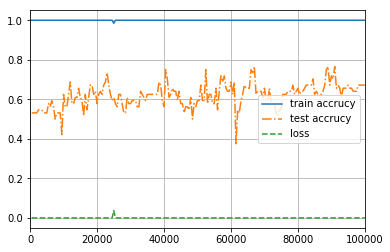

In [18]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 64, 64, 3])
#x = tf.placeholder(tf.float32, [None, 3072])
y = tf.placeholder(tf.int64, [None])
# [None], eg: [0,5,6,3]
#x_image = tf.reshape(x, [-1, 3, 32, 32])
# 32*32
#x_image = tf.transpose(x_image, perm=[0, 2, 3, 1])

# conv1: 神经元图， feature_map, 输出图像
conv1 = tf.layers.conv2d(x,
                         64, # output channel number
                         (5,5), # kernel size
                         strides=(2, 2),
                         padding = 'same',
                         activation = tf.nn.relu,
                         )
bn1 = tf.contrib.layers.batch_norm(conv1, center=True, scale=True,
                                          decay=0.9,
                                          updates_collections=None)
d1 = tf.layers.dropout(
    bn1,
    rate=0.5,
    noise_shape=None,
    seed=None,
    training=False,
    name=None
    )


conv2 = tf.layers.conv2d(d1,
                         128, # output channel number
                         (5,5), # kernel size
                         strides=(2, 2),
                         padding = 'same',
                         activation = tf.nn.relu,
                         )
bn2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True,
                                          decay=0.9, 
                                          updates_collections=None)
d2 = tf.layers.dropout(
    bn2,
    rate=0.5,
    noise_shape=None,
    seed=None,
    training=False,
    name=None
    )

conv3 = tf.layers.conv2d(d2,
                         256, # output channel number
                         (5,5), # kernel size
                         strides=(2, 2),
                         padding = 'same',
                         activation = tf.nn.relu,
                         )
bn3 = tf.contrib.layers.batch_norm(conv3, center=True, scale=True,
                                          decay=0.9, 
                                          updates_collections=None)
d3 = tf.layers.dropout(
    bn3,
    rate=0.5,
    noise_shape=None,
    seed=None,
    training=False,
    name=None
    )

# [None, 4 * 4 * 32]
flatten = tf.layers.flatten(d3)
y_ = tf.layers.dense(flatten, 6)

loss = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)
# y_ -> sofmax
# y -> one_hot
# loss = ylogy_

# indices
predict = tf.argmax(y_, 1)
# [1,0,1,1,1,0,0,0]
correct_prediction = tf.equal(predict, y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

with tf.name_scope('train_op'):
    train_op = tf.train.AdamOptimizer(1e-3).minimize(loss)
init = tf.global_variables_initializer()
batch_size = 64
train_steps = 100000
test_steps = 5

# train 10k: 71.35%
with tf.Session() as sess:
    sess.run(init)
    all_steps = []
    all_train_acc = []
    all_test_steps = []
    all_test_acc = []
    all_test_acc_val = []
    all_loss = []
    saver = tf.train.Saver()
    #show_all_variables()
    # log dir
    #summary_op = tf.summary.merge_all()

    #writer = tf.summary.FileWriter("./logs/" + '_'.join(
        #[config.DATASET_TRAIN, config.MODEL_NAME]), sess.graph)

    log_prefix = './checkpoint' + '/' + 'train_cDCGAN'
    counter = 1
    #start_time = time.time()
    could_load, checkpoint_counter = load(log_prefix, saver, sess)
    if could_load:
        counter = checkpoint_counter
        print(" [*] Load SUCCESS")
    else:
        print(" [!] Load failed...")
    for i in range(train_steps):
        
        
        
        batch_data, batch_labels = train_data.next_batch(batch_size)
        loss_val, acc_val, _ = sess.run(
            [loss, accuracy, train_op],
            feed_dict={
                x: batch_data,
                y: batch_labels})
        if (i+1) % 500 == 0:
            save(log_prefix, counter, saver, sess)
            print('[Train] Step: %d, loss: %4.5f, acc: %4.5f' 
                  % (i+1, loss_val, acc_val))
            all_steps.append(i)
            all_train_acc.append(acc_val)
            all_loss.append(loss_val)
            #if (i+1) % 1000 == 0:
            test_data = SteelData(False,False)


            test_batch_data, test_batch_labels \
                        = test_data.next_batch(batch_size)
            test_acc_val = sess.run(
                        [accuracy],
                        feed_dict = {
                            x: test_batch_data, 
                            y: test_batch_labels
                        })
            all_test_acc_val.append(test_acc_val)

            all_test_steps.append(i)
            #test_acc = np.mean(all_test_acc_val)
            test_acc =  np.mean(test_acc_val)
        #all_test_acc.append(test_acc)
            print('[Test ] Step: %d, acc: %4.5f'
                  % (i+1, test_acc))
            counter += 1
    #print(all_steps)      
    #print(all_train_acc)
    fig,ax = plt.subplots()
 
    #plt.xlabel('migration speed (MB/s)')
    #plt.ylabel('migration time (s); request delay (ms)')

    """set interval for y label"""
    #yticks = range(0,1,11)
    #ax.set_yticks(yticks)


    """set min and max value for axes"""
    #ax.set_ylim([0,1])
    ax.set_xlim([0,100000])


    #x = [57,56,55,54,53,52,51,50,49,48,47,46,45,44,43]
    line1, = plt.plot(all_steps,all_train_acc,label="train accrucy")
    line2, =plt.plot(all_steps,all_test_acc_val,'-.',label="test accrucy")
    line3, =plt.plot(all_steps,all_loss,'--',label="test accrucy")
    #plt.plot(all_steps,all_test_acc_val,"+-",label="request delay")

    """open the grid"""
    plt.grid(True)

    #plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
    plt.legend([line1, line2,line3], ['train accrucy', 'test accrucy','loss'], loc = 'best') 
    #plt.savefig('./test.png')
    plt.savefig('./test1.png')
    plt.show()




In [ ]:
print(all_test_acc_val)

In [ ]:
fig,ax = plt.subplots()
 
#plt.xlabel('migration speed (MB/s)')
    #plt.ylabel('migration time (s); request delay (ms)')

    #"""set interval for y label"""
    #yticks = range(0,1,11)
    #ax.set_yticks(yticks)


    #"""set min and max value for axes"""
ax.set_ylim([0,1.1])
ax.set_xlim([0,10000])


    #x = [57,56,55,54,53,52,51,50,49,48,47,46,45,44,43]
line1, = plt.plot(all_steps,all_train_acc,label="train accrucy")
line2, =plt.plot(all_steps,all_test_acc_val,'-.',label="test accrucy")
    #plt.plot(all_steps,all_test_acc_val,"+-",label="request delay")

 #"""open the grid"""
plt.grid(True)

    #plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.legend([line1, line2], ['train accrucy', 'test accrucy'], loc = 'best') 
plt.savefig('./test.png')
plt.show()

In [ ]:
fig,ax = plt.subplots()
 
#plt.xlabel('migration speed (MB/s)')
    #plt.ylabel('migration time (s); request delay (ms)')

    #"""set interval for y label"""
    #yticks = range(0,1,11)
    #ax.set_yticks(yticks)


    #"""set min and max value for axes"""
#ax.set_ylim([0,1.1])
ax.set_xlim([0,10000])


    #x = [57,56,55,54,53,52,51,50,49,48,47,46,45,44,43]
#line1, = plt.plot(all_steps,all_train_acc,label="train accrucy")
#line2, =plt.plot(all_steps,all_test_acc_val,'-.',label="test accrucy")
    #plt.plot(all_steps,all_test_acc_val,"+-",label="request delay")

 #"""open the grid"""
plt.grid(True)
plt.plot(all_steps,all_loss,'--',label="test accrucy")
    #plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
#plt.legend([line1, line2], ['train accrucy', 'test accrucy'], loc = 'best') 
plt.savefig('./test2.png')
plt.show()

In [ ]:
import csv

In [ ]:
row1 = all_train_acc
print(row1)

In [ ]:
row2 = all_steps

In [ ]:
data = list(map(lambda x:[x],row1))
with open('3.csv','w') as f:
    f_csv = csv.writer(f)
    for i in data:
            f_csv.writerow(i)
    #f_csv.writerows(row2)
    #f_csv.writerows(row1)

In [ ]:
np.mean(all_test_acc_val[-6:])